In [5]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

def parabolic(x):
    return x**2 + 10

def sine(x):
    return np.sin(x)

def inverse(x):
    return 1/x

def mos(x):
    return 2**x + np.sin(x)

def exp(x):
    return x**2 + np.sin(x)

from scipy import optimize

def callback(x):
    history.append(x)
    
# The default (Nelder Mead)
flist = [parabolic, sine, inverse, mos, exp]  
optimizer_list = ['Nelder-Mead','BFGS','CG']
x0_option = [0,3]

progress = []
for f,m,o in product(flist,optimizer_list,x0_option): 
    history = []
    # print(f,m,o)
    result = optimize.minimize(f,x0 = o, method = m, tol=1e-9,callback = callback)
    xf = result["x"]
    callback(xf)
    progress.append(np.array(history))

#
print(len(progress))
# print(len(progress[0]))
# print(len(progress[1]))
# print(len(progress[2]))
# print(len(progress[3]))



30


C:\Users\erick\AppData\Local\Temp\ipykernel_18128\1074433289.py:12: RuntimeWarning: divide by zero encountered in true_divide
  return 1/x
F:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:153: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
F:\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:470: RuntimeWarning: invalid value encountered in subtract
  dx = ((x0 + h) - x0)
F:\Anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:556: RuntimeWarning: invalid value encountered in double_scalars
  dx = x[i] - x0[i]  # Recompute dx as exactly representable number.
F:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:403: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = min(1.0, 1.01*2*(phi0 - old_phi0)/derphi0)
F:\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:441: RuntimeWarning: invalid value encountered in double_scalars
  if (phi_a1 > phi0 + c1 * alpha1 * derphi0) o

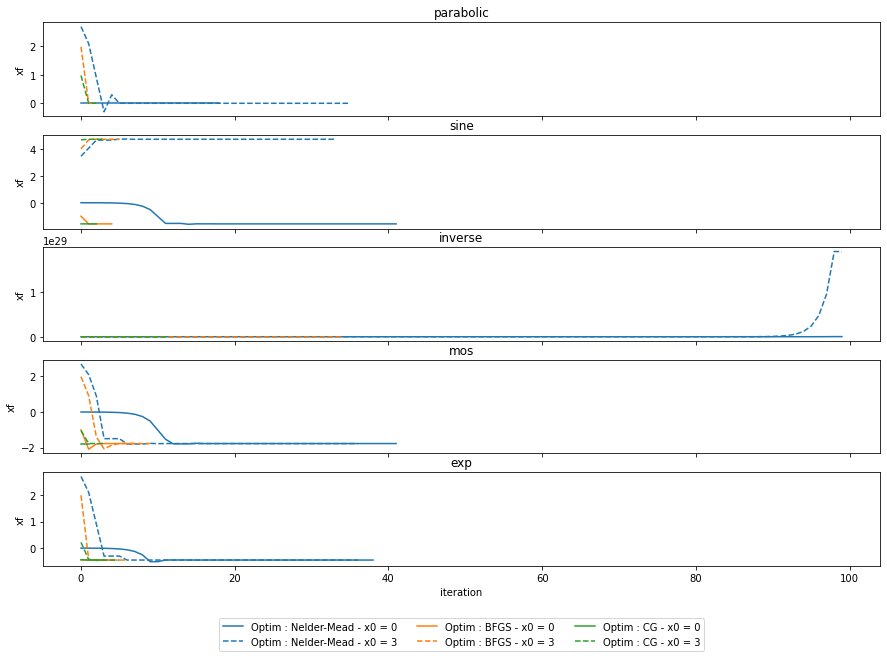

In [6]:
fig, axes = plt.subplots(len(flist),1,figsize=(15,10),sharex=True)
for k in range(len(flist)):
    func_name = str(flist[k]).split(' ')[1]
    axes[k].set_title(func_name)
    axes[k].set_ylabel('xf')
    Noptim = len(optimizer_list)
    Nx0 = len(x0_option)
    prev_color = None
    for i,j in product(range(Noptim), range(Nx0)):
        idx = k*(Noptim*Nx0) + i*Nx0 + j
        # print(idx)
        plot_cond = progress[idx]<10
        plot_cond = np.arange(len(progress[idx]))
        if idx%2:#odd index, 2nd choice of x0
            axes[k].plot(progress[idx][plot_cond],label='Optim : '+str(optimizer_list[i]+' - x0 = '+str(x0_option[j])), c=prev_color,ls='--')
        else:#even index, 1st choice of x0
            line, = axes[k].plot(progress[idx][plot_cond],label='Optim : '+str(optimizer_list[i]+' - x0 = '+str(x0_option[j])))
            prev_color = line.get_color()
    

plt.xlabel('iteration')
# plt.xlim([-0.5,20])
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=3)


